# Simplex Tree

In [1]:
import gudhi as gd

In [2]:
st = gd.SimplexTree()

The `st` object has class `SimplexTree`. For now, `st` is an empty simplex tree.

The `SimplexTree` class has several useful methods for the practice of TDA. For instance, there are methods to define new types of simplicial complexes from existing ones.

The `insert()` method can be used to insert simplices in the simplex tree. In the simplex tree:

- vertices (0-dimensional simplices) are represented with integers, 
- edges (1-dimensional simplices) are represented with a length-2 list of integers (corresponding to the two vertices involved in the edge),
- triangles (2-dimensional simplices) by three integers are represented with a length-3 list of integers (corresponding to the three vertices involved in the triangle),
- etc.

In [3]:
st.insert([0, 1])
st.insert([1, 3], filtration = 0.5)

True

In [4]:
st.insert([0, 1, 2])

True

In [5]:
st.insert([0, 3], filtration = 1.0)

True

In [6]:
simplices = st.get_simplices()
for simplex in simplices:
    print(simplex)

([0, 1, 2], 0.0)
([0, 1], 0.0)
([0, 2], 0.0)
([0, 3], 1.0)
([0], 0.0)
([1, 2], 0.0)
([1, 3], 0.5)
([1], 0.0)
([2], 0.0)
([3], 0.5)


## Betti Numbers for a simplex tree
The `betti_numbers()` method can be used to compute the betti numbers of the simplicial complex.

But for that the `compute_persistence()` method needs to be active.

In [7]:
st.compute_persistence()
st.betti_numbers()

[1, 1]

# Building simplicial complexes from a point cloud

In [8]:
import numpy as np
import pickle as pickle
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

The walk of 3 persons A, B and C, has been recorded using the accelerometer sensor of a smartphone in their pocket, giving rise to 3 multivariate time series in $\mathbb R ^d$: each time series represents the 3 coordinates of the acceleration of the corresponding walker in a coordinate system attached to the sensor. 

Notice that the smartphone was carried in a possibly different position for each person and thus these time series cannot be compared coordinates by coordinates.

Using a sliding window, each serie have been splitted in a list of 100 times series made of 200 consecutive points, that are stored in `data_A`, `data_B` and `data_C`.

We load the data with the pickle module :

In [9]:
f = open("./datasets/data_acc","rb")
data = pickle.load(f)    
f.close()

In [10]:
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label  = data[3]
print(label)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C

In [11]:
np.shape(data_A)

(100, 200, 3)

The object <code>data_A</code> is a list of 100 time series of the 3d acceleration for Walker A, let's have a look at the dimensions of <code>data_A</code>:

We now represent the trajectory of accelerations for the first trajectory of walker A :

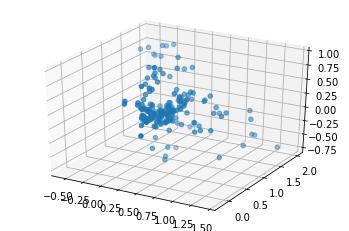

In [12]:
data_A_sample = data_A[0]
fig = plt.figure()
plt.rcParams['figure.figsize'] = [12, 12]
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_A_sample[:, 0], data_A_sample[:, 1], data_A_sample[:, 2]);

## Vietoris-Rips complex


The [$\alpha$-Rips complex](https://en.wikipedia.org/wiki/Vietoris%E2%80%93Rips_complex) of a point cloud $\mathbb X$ in $(\mathbb R^d,\| \|_2)$  is an [abstract simplicial complex](https://en.wikipedia.org/wiki/Abstract_simplicial_complex) that can be defined  by forming a simplex for every finite subset of $\mathbb X$ that has diameter at most $\alpha$. 

Vietoris-Rips complexes can be defined for any metric space from the  matrix of pairwise distances (see this [notebook](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplicial-complexes-from-distance-matrix.ipynb)).

In order to efficiently compute an $\alpha$-Rips complex, one can start by building a topological graph with:

- as many vertices as there are points; and,
- as edges only pairs of points whose distance is smaller than or equal to $\alpha$.

In other words, it corresponds to the [1-skeleton](https://en.wikipedia.org/wiki/N-skeleton) of the point cloud, with upper-bounded edge length. In GUDHI, this is performed via the `RipsComplex()` function (see the [Documentation](http://gudhi.gforge.inria.fr/python/latest/rips_complex_user.html) for details on the syntax):

In [13]:
skeleton = gd.RipsComplex(points = data_A_sample, max_edge_length = 0.3)

The `max_edge_length` parameter is the maximal diameter: only edges of length smaller than or equal to this value are included in the 1-skeleton.

From the $\alpha$-*truncated* 1-skeleton, it is then possible to add higher dimensional simplices to the simplicial complex, subject to the condition that all their faces are already in the complex. Their filtration value is then defined as the maximum filtration value of its faces which matches their diameter by design. This process necessarily yields the desired $\alpha$-Rips complex since filtration values can never exceeds $\alpha$ in this way. 

In practice, one should define a maximal dimension of simplicies to be added to the Rips complex for computational reasons. In GUDHI, this is achieved through the `create_simplex_tree()` method of the `RipsComplex` class which takes the argument `max_dimension` to limit the tree:

In [14]:
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3) 

In [15]:
Rips_simplex_tree_sample.dimension()

3

In [16]:
Rips_simplex_tree_sample.num_vertices()

200

In [17]:
Rips_simplex_tree_sample.num_simplices()

159960

## Betti numbers for a Rips-complex

In [18]:
Rips_simplex_tree_sample.compute_persistence()
Rips_simplex_tree_sample.betti_numbers()

[10, 5, 0]

# Reading the HDF5 data

In [19]:
import h5py
import numpy as np

filename = "datasets/highrotminhel/velocity.800000.h5"
hf = h5py.File(filename, 'r')
hf.keys()

datasets = hf['PS']
print("Dataset " + str(datasets))

vx = hf.get('PS/vx')
vx = np.array(vx)

vy = hf.get('PS/vy')
vy = np.array(vy)

vz = hf.get('PS/vz')
vz = np.array(vz)

vx, vy, vz
# vx.shape

Dataset <HDF5 group "/PS" (3 members)>


(array([[[1.2747257 , 1.29178929, 1.30603277, ..., 1.24590163,
          1.24957215, 1.25957265],
         [1.26573187, 1.28182081, 1.29929004, ..., 1.24762164,
          1.2478959 , 1.25388209],
         [1.25454757, 1.26774257, 1.28464133, ..., 1.24498602,
          1.24378037, 1.2464381 ],
         ...,
         [1.25994071, 1.25804034, 1.25482051, ..., 1.22722243,
          1.24217525, 1.2546933 ],
         [1.27639266, 1.28227938, 1.28142876, ..., 1.23474553,
          1.24761837, 1.26337922],
         [1.2797349 , 1.29338325, 1.30027598, ..., 1.24115125,
          1.2494743 , 1.26345994]],
 
        [[1.24840583, 1.26549499, 1.28049232, ..., 1.2209193 ,
          1.22399056, 1.23359068],
         [1.23913787, 1.25490595, 1.27245332, ..., 1.2227895 ,
          1.22214411, 1.22765756],
         [1.22771113, 1.24057631, 1.25716867, ..., 1.22059237,
          1.21804633, 1.21996886],
         ...,
         [1.23705564, 1.2364141 , 1.23398761, ..., 1.20282475,
          1.21765178, 1.

In [20]:
import visit
DefineVectorExpression("v","{<PS/vx>,<PS/vy>,<PS/vz>}")

NameError: name 'DefineVectorExpression' is not defined

## Plotting the data

In [ ]:
vx = hf.get('PS/vx')
vx = np.array(vx)

vy = hf.get('PS/vy')
vy = np.array(vy)

vz = hf.get('PS/vz')
vz = np.array(vz)

vz.shape

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('vx')
ax.set_ylabel('vy')
ax.set_zlabel('vz')
ax.set_title("highrotminhel/velocity.800000.h5 plot")
ax.scatter(vx[:, 0], vy[:, 1], vz[:, 2],  marker='.');

## Computing the absolute of the curl of a vector field

Suppose F(x,y,z) = y^2zi - xyj + z^2k, then:
    
    y would be R[1], x is R[0] and z is R[2]
    the unit vectors i, j, k of the 3 axes, would be respectively R.x, R.y, R.z.


In [ ]:
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
R = ReferenceFrame('R')

F = R[1]**2 * R[2] * R.x - R[0]*R[1] * R.y + R[2]**2 * R.z

G = curl(F, R) 
G

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = 0
v = y**2
w = -2*y*z - y

ax.quiver(x, y, z, u, v, w, length=0.1)

plt.show()